# Sect 24 (v2.1): Regularization

- online-ds-pt-100719
- 03/19/2020


## Objectives

**DISCUSSION:**
- Discuss Regularization Techniques
    - Ridge Regression (L2 normalization)
    - Lasso Regression (L1 normalization)
- AIC/BIC
- Compare Feature Selection methods

**APPLICATION:**
- Practice turning repetitive code into flexible functions/loops

- Lab Walkthrough (pick one):
    - [Sect 24: Ridge and Lasso Regression Lab](https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/section-28-section-recap/ridge-and-lasso-regression-lab)
    
    - [Sect 24: Extensions to Linear Models Lab](https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/section-28-section-recap/extensions-to-linear-models-lab)
    
- Alternative:
    - Walk through feature selection lesson, but re-write so that all of the results for each method are collected into one table for us to review together.
    - [Sect 24: Feature Selection](https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/section-28-section-recap/feature-selection-methods)

In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-poster')

fsds_1007219  v0.7.16 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


# Regularization techniques

We can "shrink down" prediction variables effects instead of deleting/zeroing them

# Penalized Estimation

> ***You've seen that when the number of predictors increases, your model complexity increases, with a higher chance of overfitting as a result.***  

> Now, instead of completely "deleting" certain predictors from a model (which is equal to setting coefficients equal to zero) we can reduce the values of the coefficients to make them less sensitive to noise in the data. 

> This is called **penalized estimation**.

> **Ridge and Lasso regression** are two examples of penalized estimation.<br>There are multiple advantages to using these methods:
- They reduce model complexity
- The may prevent from overfitting
- Some of them may perform variable selection at the same time (when coefficients are set to 0)
- They can be used to counter multicollinearity

> Lasso and Ridge are two commonly used so-called **regularization techniques**. (Regularization is a general term used when one tries to battle overfitting.)


## Linear Regression Cost Function Previously Used (RSS)

- ### For a single predictor (X)
$$ \large \text{cost_function}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - (mx_i + b))^2$$


- ###  multiple predictors, the equation becomes:
$$ \large \text{cost_function}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij} ) -b )^2$$
- where $k$ is the number of predictors
- and $j$ is each individual predictor.

## Ridge Regression - L2 Norm Regularization

Define a penalty ***hyperparameter*** $\lambda$ for extra terms (large $m$)

<!-- $$ =\sum_{i=1}^n(y_i - \hat{y})^2= \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij} + b))^2 + \lambda \sum_{i=1}^n m_i^2$$/-->

$$\large J_{\text{ridge}}=\sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij})-b)^2 + \lambda \sum_{j=1}^p m_j^2$$

- **By adding the penalty term $\lambda$, ridge regression puts a constraint on the coefficients $m$.**
- Therefore, large coefficients will penalize the optimization function. 
    - This shrinks the coefficients and helps to reduce model complexity and multicollinearity.

- **Error term added to cost function** 
    - $\large ...  +   \lambda \sum_{i=1}^n m_i^2$
    - Notice that  $m_i^2$ is squared, hence "L***2*** norm regularization"

- With two predictors there is a penalty term m for each predictor.
$$\large J_\text{ridge}= \sum_{i=1}^n(y_i - \hat{y})^2 = $$

$$\large  \sum_{i=1}^n(y_i - ((m_1x_{1i})-b)^2 + \lambda m_1^2 + (m_2x_{2i})-b)^2 + \lambda m_2^2)$$

### Uses

- Used mostly to prevent overfitting (but since includes all features it can be computationally expensive (for many variables))

## Lasso Regression - L1 Norm Regularization

"Least Absolute Shrinkage and Selection Operator"

$$\large J_\text{lasso}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij})-b)^2 + \lambda \sum_{j=1}^p \mid m_j \mid$$

- **Error term added to cost function** 
    - $ \large ... + \lambda \sum_{j=1}^p \mid m_j \mid$
    - Notice that  $m$ has no exponent (meaning its actually $m^1$, hence "L***1*** norm regularization"



If you have two predictors the full equation would look like this (notice that there is a penalty term `m` for each predictor in the model - in this case, two): 
$$ \text{cost_function_lasso}= \sum_{i=1}^n(y_i - \hat{y})^2 = $$

$$\sum_{i=1}^n(y_i - ((m_1x_{1i})-b)^2 + \lambda \mid m_1 \mid) + ((m_2x_{2i})-b)^2 + \lambda \mid m_2 \mid) $$

### Uses

- Lasso also helps with over fitting 
- **Lasso shrinks the less important features' coefficients to zero**, removing them altogether. 
    - Therefore, Lasso regression can be used for **feature selection**

### Using Regularization

- ***Make sure to standardize the data before performing ridge or lasso regression***, otherwise features with large values/units will be unfairly penalized.
- **Fit-transform the training data, only transform the test data**

```python
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
```

## Ridge & Lasson Regression Summary:

In Ridge regression, the cost function is changed by adding a penalty term to the square of the magnitude of the coefficients.

$$ \text{cost_function_ridge}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij})-b)^2 + \lambda \sum_{j=1}^p m_j^2$$

Lasso regression is very similar to Ridge regression, except that the magnitude of the coefficients are not squared in the penalty term.

$$ \text{cost_function_lasso}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij})-b)^2 + \lambda \sum_{j=1}^p \mid m_j \mid$$


## Applying Ridge and Lasso Regression with Scikit-Learn

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split

## Load the data
df = fs.datasets.load_autompg()

y = df[['mpg']]
X = df.drop(['mpg', 'car name', 'origin'], axis=1)

# Perform test train split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                     random_state=12)
[var.shape for var in [X_train , X_test, y_train, y_test]]

[i] Source url with details: https://www.kaggle.com/uciml/autompg-dataset


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


[(274, 6), (118, 6), (274, 1), (118, 1)]

In [3]:
scale = MinMaxScaler()
X_train_transformed = scale.fit_transform(X_train)
X_test_transformed = scale.transform(X_test)

### Exhibit A: The case for functions and dictionaries

- Code From [Ridge And Lasso Regression Lesson](https://learn.co/tracks/module-3-data-science-career-2-1/machine-learning/section-24-feature-selection-ridge-and-lasso/ridge-and-lasso-regression)

- The following code is from the Learn.co lesson and its goal is to create,fit and evaluate 3 different models to compare the results.

In [4]:
# Build a Ridge, Lasso and regular linear regression model  
# Note that in scikit-learn, the regularization parameter is denoted by alpha (and not lambda)
ridge = Ridge(alpha=0.5)
ridge.fit(X_train_transformed, y_train)

lasso = Lasso(alpha=0.5)
lasso.fit(X_train_transformed, y_train)

lin = LinearRegression()
lin.fit(X_train_transformed, y_train)


# Generate preditions for training and test sets
y_h_ridge_train = ridge.predict(X_train_transformed)
y_h_ridge_test = ridge.predict(X_test_transformed)

y_h_lasso_train = np.reshape(lasso.predict(X_train_transformed), (274, 1))
y_h_lasso_test = np.reshape(lasso.predict(X_test_transformed), (118, 1))

y_h_lin_train = lin.predict(X_train_transformed)
y_h_lin_test = lin.predict(X_test_transformed)


print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(X_train_transformed))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test_transformed))**2))
print('\n'*3)
print('Ridge parameter coefficients:\n', ridge.coef_)
print('Lasso parameter coefficients:\n', lasso.coef_)
print('Linear model parameter coefficients:\n', lin.coef_)

Train Error Ridge Model mpg    2684.673787
dtype: float64
Test Error Ridge Model mpg    2067.795707
dtype: float64


Train Error Lasso Model mpg    4450.979518
dtype: float64
Test Error Lasso Model mpg    3544.087085
dtype: float64


Train Error Unpenalized Linear Model mpg    2658.043444
dtype: float64
Test Error Unpenalized Linear Model mpg    1976.266987
dtype: float64




Ridge parameter coefficients:
 [[ -2.06904445  -2.88593443  -1.81801505 -15.23785349  -1.45594148
    8.1440177 ]]
Lasso parameter coefficients:
 [-9.09743525 -0.         -0.         -4.02703963  0.          3.92348219]
Linear model parameter coefficients:
 [[ -1.33790698  -1.05300843  -0.08661412 -19.26724989  -0.37043697
    8.56051229]]


### Q1: What are the issues/limitations of the way we tested/compared the 3 different types of models? 
-  A: 

### Q2: What other limitation does the above code have? (what is inflexible?)

- A:

### Whats the solution? 
- Functions and dictionaries!

In [5]:
from sklearn.metrics import r2_score, mean_squared_error

def make_model():
    """Takes a sklearn model and train/test data to fit model, 
    get R2 and MSE for both the training and test data.
    
    Returns:
        DataFrame: results as a df
        model: fit scikit-learn model itself"""
    
    pass

In [6]:
from sklearn.metrics import r2_score, mean_squared_error

def make_model(model,X_train,X_test,y_train,y_test):
    """Takes a sklearn model and train/test data to fit model, 
    get R2 and MSE for both the training and test data.
    
    Returns:
        DataFrame: results as a df
        model: fit scikit-learn model itself"""
    
    model.fit(X_train,y_train)

    ## Get predictions
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    
    res = [['Data','R2','MSE','RMSE']]
    
    ## Calc MSE
    mse_tr = mean_squared_error(y_train,y_hat_train)
    mse_te = mean_squared_error(y_test,y_hat_test)
    
    ## Calc R2
    r2_tr = r2_score(y_train,y_hat_train)
    r2_te = r2_score(y_test,y_hat_test)
    
    res = [['Data','R2','MSE']]
    res.append(['Train', r2_tr, mse_tr])   
    res.append(['Test', r2_te,mse_te])

    res_df = pd.DataFrame(res[1:],columns=res[0]).round(4)
    return res_df, model

In [7]:
## Use a dictionary to store our models
models_to_make = dict(linear = LinearRegression(),
                     lasso=Lasso(alpha=0.5),
                     ridge=Ridge(alpha=0.5))

models_to_make['linear']

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
## Test our dictionary and function together to make a linear regression.
res,model = make_model(models_to_make['linear'],X_train,X_test,y_train,y_test)
res['Type'] = 'Linear'
res

,Data,R2,MSE,Type
0,Train,0.8204,9.7009,Linear
1,Test,0.7735,16.7480,Linear


In [9]:
## Loop through models_to_make and save all results

## Create an empty list to store result dfs
results=[]

## Create an empty dict to store fit models
fit_models = {}

for model_type,mod in models_to_make.items():

    ## get model results and fit model using make_model
    model_res,mod = make_model(mod,X_train,X_test,y_train,y_test)
    
    ## Add model type as column to res
    model_res['Type'] = model_type
    
    # Display results
    display(model_res)
    
    ## Save fit model to models dict 
    fit_models[model_type] = mod
    
    ## Save df to list 
    results.append(model_res)

## Concatenate results 
res_df = pd.concat(results)
res_df

,Data,R2,MSE,Type
0,Train,0.8204,9.7009,linear
1,Test,0.7735,16.7480,linear


,Data,R2,MSE,Type
0,Train,0.8196,9.7438,lasso
1,Test,0.7717,16.8778,lasso


,Data,R2,MSE,Type
0,Train,0.8204,9.7009,ridge
1,Test,0.7734,16.7485,ridge


,Data,R2,MSE,Type
0,Train,0.8204,9.7009,linear
1,Test,0.7735,16.7480,linear
0,Train,0.8196,9.7438,lasso
1,Test,0.7717,16.8778,lasso
0,Train,0.8204,9.7009,ridge
1,Test,0.7734,16.7485,ridge


In [10]:
## Use styling to make it easier to find the best scores.
res_df.set_index(['Type','Data']).style.highlight_max('R2')

In [11]:
## Now examine the coefficients of one of the fit models
X_train.columns, fit_models['linear'].coef_

(Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
        'model year'],
       dtype='object'),
 array([[-2.67581395e-01, -2.72095202e-03, -4.70728934e-04,
         -5.69363176e-03, -2.35947111e-02,  7.13376024e-01]]))

> #### Sidebar: You've heard of List Comprehensions but did you that there are Dictionary Comprehensions too?!

In [12]:
## Get the coefficients of every model in a dictionary using a dict comprehension
dict_comp = {k:v.coef_ for k,v in fit_models.items()}
dict_comp

{'linear': array([[-2.67581395e-01, -2.72095202e-03, -4.70728934e-04,
         -5.69363176e-03, -2.35947111e-02,  7.13376024e-01]]),
 'lasso': array([-0.        , -0.00665017,  0.        , -0.00577122, -0.        ,
         0.67082491]),
 'ridge': array([[-2.65807787e-01, -2.74899549e-03, -4.66339114e-04,
         -5.69392986e-03, -2.35687913e-02,  7.13268278e-01]])}

In [13]:
## Notice the shapes of the arrays are not the same
for k,v in dict_comp.items():
    print(f"{k} shape= {v.shape}")

    
## The following will error
try:
    pd.DataFrame(dict_comp)
except Exception as e:
    print(f'\nERROR!: {e}')

linear shape= (1, 6)
lasso shape= (6,)
ridge shape= (1, 6)

ERROR!: Data must be 1-dimensional


In [14]:
## Use .flatten() to make coefs 1D
dict_comp = {k:v.coef_.flatten() for k,v in fit_models.items()}
## Notice the shapes of the arrays are not the same
for k,v in dict_comp.items():
    print(f"{k} shape= {v.shape}")

    
## The following will error
pd.DataFrame(dict_comp)

linear shape= (6,)
lasso shape= (6,)
ridge shape= (6,)


,linear,lasso,ridge
0,-0.267581,-0.000000,-0.265808
1,-0.002721,-0.006650,-0.002749
2,-0.000471,0.000000,-0.000466
3,-0.005694,-0.005771,-0.005694
4,-0.023595,-0.000000,-0.023569
5,0.713376,0.670825,0.713268


In [15]:
### Put it all together 
df_coef = pd.DataFrame({k:v.coef_.flatten() for k,v in fit_models.items()},
            index= X.columns)
df_coef

,linear,lasso,ridge
cylinders,-0.267581,-0.000000,-0.265808
displacement,-0.002721,-0.006650,-0.002749
horsepower,-0.000471,0.000000,-0.000466
weight,-0.005694,-0.005771,-0.005694
acceleration,-0.023595,-0.000000,-0.023569
model year,0.713376,0.670825,0.713268


In [16]:
## Tanspose df and round
df_coef.T.round(2)

,cylinders,displacement,horsepower,weight,acceleration,model year
linear,-0.27,-0.00,-0.0,-0.01,-0.02,0.71
lasso,-0.00,-0.01,0.0,-0.01,-0.00,0.67
ridge,-0.27,-0.00,-0.0,-0.01,-0.02,0.71


## Discussion: what was the result of the different regressions on the coefficients?

- 

# Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC)

## Uses of AIC and BIC

- Performing feature selection: comparing models with only a few variables and more variables, computing the AIC/BIC and select the features that generated the lowest AIC or BIC
- Similarly, selecting or not selecting interactions/polynomial features depending on whether or not the AIC/BIC decreases when adding them in
- Computing the AIC and BIC for several values of the regularization parameter in Ridge/Lasso models and selecting the best regularization parameter, and many more! 

### Akaike's Information Criterion (AIC)


The formula for the AIC, invented by Hirotugu Akaike in 1973 and short for "Akaike's Information Criterion" is given by:

$$ \large \text{AIC} = -2\ln(\hat{L}) + 2k $$

Where:
* $k$ : length of the parameter space (i.e. the number of features)
* $\hat{L}$ : the maximum value of the likelihood function for the model

Another way to phrase the equation is:

$$ 
\large \text{AIC(model)} =  - 2 * \text{log-likelihood(model)} + 2 * \text{length of the parameter space} $$


- AIC used to **compare** models with unbounded units not independently interpretable

- If model uses Maximum Likelihood Estimation, log-likelihood is automatically computed, so AIC is easy to calculate.
- AIC acts like penalized log-likelihood criterion, balancing good fit and complexity

- In Python, the AIC is built into `statsmodels` and in `sklearn` (such as `LassoLarsIC`, which you'll use in the upcoming lab). 

### Bayesian Information Criterion (BIC)

- Bayesian alternative to AIC, used the same way.

 $$\large \text{BIC} = -2\ln(\hat L) + \ln(n)*k $$


where:

* $\hat{L}$ and $k$ are the same as in AIC
* $n$ : the number of data points (the sample size)

Another way to phrase the equation is:

$$ \text{BIC(model)} = -2 * \text{log-likelihood(model)} + \text{log(number of observations)} * \text{(length of the parameter space)} $$

In [17]:
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
alphas = np.arange(0.1,100,0.1)

lasso_cvA = LassoLarsIC(criterion='aic')
lasso_cvA.fit(X_train,y_train);
lasso_cvA.alpha_


lasso_cvB = LassoLarsIC(criterion='bic')
lasso_cvB.fit(X_train,y_train);
lasso_cvB.alpha_

0.001405403449056324

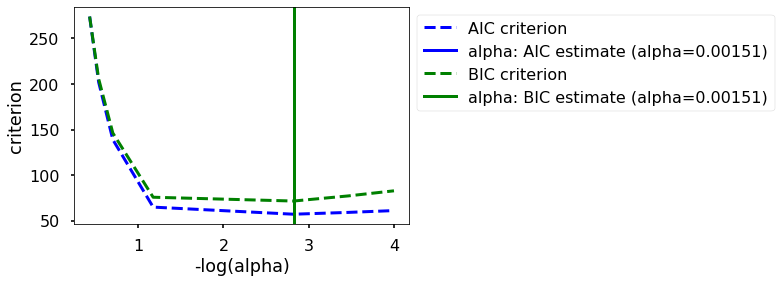

In [18]:
def plot_ic_criterion(model, name, color):
    """Taken from:
    https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html"""
    # This is to avoid division by zero while doing np.log10
    EPSILON = 1e-4
    alpha_ = model.alpha_ + EPSILON
    alphas_ = model.alphas_ + EPSILON
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label=f'alpha: {name} estimate (alpha={round(alpha_,5)})')
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')
#     plt.title(title)

plot_ic_criterion(lasso_cvA,'AIC','blue')
plot_ic_criterion(lasso_cvB,'BIC','green')#,'BIC' )
plt.legend(bbox_to_anchor=[1,1],loc='upper left')
# plt.title('')

# Feature Selection
[Lesson](https://learn.co/tracks/module-3-data-science-career-2-1/machine-learning/section-24-feature-selection-ridge-and-lasso/feature-selection-methods)

## Types of Feature Selection 

* Domain knowledge
* Wrapper methods
* Filter methods
* Embedded methods

> ### Wrapper Methods
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-feature-selection-methods-online-ds-pt-100719/master/images/new_wrapper.png">


> ### Filter Methods
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-feature-selection-methods-online-ds-pt-100719/master/images/new_filter.png">


> ### Embed Methods
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-feature-selection-methods-online-ds-pt-100719/master/images/new_embedded.png">

# ACTIVITY

[**Rewrite Feature Selection Methods Lesson to easily capture and compare results across methods.**](https://learn.co/tracks/module-3-data-science-career-2-1/machine-learning/section-24-feature-selection-ridge-and-lasso/feature-selection-methods)


In [19]:
## Feature Selection Dataset
data= "https://raw.githubusercontent.com/learn-co-students/dsc-feature-selection-methods-online-ds-pt-100719/master/diabetes.tab.txt"
df = pd.read_csv(data,sep='\t')

In [20]:
## Make a new version of make_model that also adds a note column to results
def run_model(model,X_train,X_test,y_train,y_test,note=''):
    pass

In [39]:
def run_model(model,X_train,X_test,y_train,y_test,note=''):
    """Takes a sklearn model and train/test data to fit model, 
    get R2 and MSE for both the training and test data.
    
    Returns:
        DataFrame: results as a df
        model: fit scikit-learn model itself"""
    
    model.fit(X_train,y_train)

    ## Get predictions
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    
    res = [['Data','R2','MSE','RMSE']]
    
    ## Calc RMSE
    mse_tr = np.sqrt(mean_squared_error(y_train,y_hat_train))
    mse_te = np.sqrt(mean_squared_error(y_test,y_hat_test))
    
    ## Calc R2
    r2_tr = r2_score(y_train,y_hat_train)
    r2_te = r2_score(y_test,y_hat_test)
    
    res = [['Data','R2','RMSE']]
    res.append(['Train', r2_tr, mse_tr])   
    res.append(['Test', r2_te,mse_te])

    res_df = pd.DataFrame(res[1:],columns=res[0]).round(4)
    res_df['Note'] = note
    return res_df#, model


In [40]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Obtain the target and features from the DataFrame
target = df['Y']
features = df.drop(columns='Y')

# Create dummy variable for sex
features['female'] = pd.get_dummies(features['SEX'], drop_first=True)
features.drop(columns=['SEX'], inplace=True)
features.head()

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,female
0,59,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,1
1,48,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,0
2,72,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,1
3,24,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,0
4,50,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,0


In [41]:
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=20, test_size=0.2)
X_train

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,female
171,43,22.1,66.0,134,77.2,45.0,3.0,4.0775,80,0
388,63,24.1,111.0,184,112.2,44.0,4.0,4.9345,82,1
268,66,34.6,115.0,204,139.4,36.0,6.0,4.9628,109,1
31,42,20.3,71.0,161,81.2,66.0,2.0,4.2341,81,0
427,39,26.9,93.0,136,75.4,48.0,3.0,4.1431,99,1
...,...,...,...,...,...,...,...,...,...,...
218,37,20.3,83.0,185,124.6,38.0,5.0,4.7185,88,0
412,69,34.3,113.0,200,123.8,54.0,4.0,4.7095,112,0
223,21,24.2,76.0,147,77.0,53.0,3.0,4.4427,79,0
271,59,27.2,107.0,158,102.0,39.0,4.0,4.4427,93,1


In [42]:
# Initialize the scaler
scaler = StandardScaler()
# Scale every feature except the binary column - female
scale_cols = X_train.drop('female',axis=1).columns
scale_cols

Index(['AGE', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6'], dtype='object')

In [43]:
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [44]:
## Make an empty RESULTS list
RESULTS = []
## Run our baseline regression and append to RESULTS
RESULTS.append(run_model(LinearRegression(),
                         X_train,X_test,y_train,y_test,'Baseline'))

In [45]:
def show_results(RESULTS,style_kws={'subset':['R2']}):
    res = pd.concat(RESULTS).set_index('Note').groupby("Data").get_group('Test')   
    try:
        display(res.style.background_gradient(**style_kws))
    except:
        display(res)
show_results(RESULTS)

,Data,R2,RMSE
Note,,,
Baseline,Test,0.418,58.8359


In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

X_poly_train = pd.DataFrame(poly.fit_transform(X_train),
                            columns=poly.get_feature_names(features.columns))

X_poly_test = pd.DataFrame(poly.transform(X_test),
                           columns=poly.get_feature_names(features.columns))

X_poly_train.head()

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,female,...,S4^2,S4 S5,S4 S6,S4 female,S5^2,S5 S6,S5 female,S6^2,S6 female,female^2
0,-0.433522,-0.967597,-2.067847,-1.623215,-1.280312,-0.347527,-0.852832,-1.095555,-1.006077,0.0,...,0.727322,0.934324,0.858015,-0.000000,1.200240,1.102213,-0.000000,1.012192,-0.000000,0.0
1,1.117754,-0.516691,1.142458,-0.168101,-0.129601,-0.424950,-0.083651,0.543382,-0.831901,1.0,...,0.006998,-0.045455,0.069589,-0.083651,0.295264,-0.452040,0.543382,0.692060,-0.831901,1.0
2,1.350445,1.850570,1.427819,0.413945,0.764667,-1.044334,1.454710,0.597504,1.519478,1.0,...,2.116182,0.869195,2.210400,1.454710,0.357011,0.907894,0.597504,2.308813,1.519478,1.0
3,-0.511086,-1.373413,-1.711146,-0.837453,-1.148802,1.278358,-1.622013,-0.796071,-0.918989,0.0,...,2.630925,1.291237,1.490612,-0.000000,0.633729,0.731581,-0.000000,0.844541,-0.000000,0.0
4,-0.743778,0.114579,-0.141664,-1.565010,-1.339491,-0.115257,-0.852832,-0.970101,0.648597,1.0,...,0.727322,0.827333,-0.553144,-0.852832,0.941095,-0.629204,-0.970101,0.420678,0.648597,1.0


In [47]:
## Make a linear regression with our X_poly data and append to RESULTS
RESULTS.append(run_model(LinearRegression(),
                         X_poly_train,X_poly_test,y_train,y_test,'Poly'))

In [48]:
## Show resuls
show_results(RESULTS)

,Data,R2,RMSE
Note,,,
Baseline,Test,0.418,58.8359
Poly,Test,0.3689,61.2678


### Filter Methods

>"The benefit of filter methods is that they can provide us with some useful visualizations for helping us gain an understanding about the characteristics of our data. To begin with, let's use a simple variance threshold to eliminate the features with low variance."

In [49]:
## Filter Methods
from sklearn.feature_selection import VarianceThreshold

threshold_ranges = np.linspace(0, 2, num=6)

results = []
for thresh in threshold_ranges:
#     print(thresh)
    selector = VarianceThreshold(thresh)
    reduced_feature_train = selector.fit_transform(X_poly_train)
    reduced_feature_test = selector.transform(X_poly_test)
    lr = LinearRegression()
    lr.fit(reduced_feature_train, y_train)
    res = run_model(lr, reduced_feature_train, reduced_feature_test,
                    y_train, y_test,f"VarThresh={round(thresh,3)}")
    
    results.append(res)

res_df = pd.concat(results)
RESULTS.append(res_df)
show_results(RESULTS)

,Data,R2,RMSE
Note,,,
Baseline,Test,0.418,58.8359
Poly,Test,0.3689,61.2678
VarThresh=0.0,Test,0.3689,61.2678
VarThresh=0.4,Test,0.3581,61.7892
VarThresh=0.8,Test,0.364,61.5029
VarThresh=1.2,Test,0.0363,75.7101
VarThresh=1.6,Test,0.0927,73.4593
VarThresh=2.0,Test,0.042,75.4839


> Well, that did not seem to eliminate the features very well. It only does a little better than the base polynomial. 

In [50]:
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest
selector = SelectKBest(score_func=f_regression)
X_k_best_train = selector.fit_transform(X_poly_train, y_train)
X_k_best_test= selector.transform(X_poly_test)
lr = LinearRegression()
lr.fit(X_k_best_train ,y_train)
RESULTS.append(run_model(lr,X_k_best_train,X_k_best_test,y_train,y_test,'KBest-f_regr'))

In [51]:
selector = SelectKBest(score_func=mutual_info_regression)
X_k_best_train = selector.fit_transform(X_poly_train, y_train)
X_k_best_test= selector.transform(X_poly_test)
lr = LinearRegression()
lr.fit(X_k_best_train ,y_train)
RESULTS.append(run_model(lr,X_k_best_train,X_k_best_test,y_train,y_test,'KBest-mutual_info'))

> Well, that did not seem to eliminate the features very well. It only does a little better than the base polynomial. 

### Wrapper methods

> Now let's use Recursive Feature elimination (RFE) to try out a wrapper method. You'll notice that scikit-learn has a built in `RFECV()` function, which automatically determines the optimal number of features to keep when it is run based off the estimator that is passed into it. Here it is in action: 

In [52]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression

rfe = RFECV(LinearRegression(),cv=5)
X_rfe_train = rfe.fit_transform(X_poly_train, y_train)
X_rfe_test = rfe.transform(X_poly_test)
lm = LinearRegression().fit(X_rfe_train, y_train)
RESULTS.append(run_model(lm, X_rfe_train, X_rfe_test, y_train, y_test,f'RFE w. {rfe.n_features_} feats'))
# print ('The optimal number of features is: ', rfe.n_features_)

## Embedded methods  
> To compare to our other methods, we will use Lasso as the embedded method of feature selection. Luckily for us, sklearn has a built-in method to help us find the optimal features! It performs cross validation to determine the correct regularization parameter (how much to penalize our function).

In [53]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(max_iter=100000, cv=5)
lasso.fit(X_train, y_train)
RESULTS.append(run_model(lasso,X_train, X_test, y_train, y_test,f'Lasso w. a={lasso.alpha_}'))
# print('The optimal alpha for the Lasso Regression is: ', lasso.alpha_)

> Let's compare this to a model with all of the polynomial features included.

In [54]:
lasso2 = LassoCV(max_iter=100000, cv=5)
lasso2.fit(X_poly_train, y_train)

RESULTS.append(run_model(lasso2, X_poly_train, X_poly_test, y_train, y_test,f'Lasso Poly w. a={lasso2.alpha_}'))
# print('The optimal alpha for the Lasso Regression is: ', lasso2.alpha_)

In [56]:
show_results(RESULTS,style_kws=dict(subset=['RMSE'],
                                   cmap = plt.cm.get_cmap('Greens').reversed()))

,Data,R2,RMSE
Note,,,
Baseline,Test,0.418,58.8359
Poly,Test,0.3689,61.2678
VarThresh=0.0,Test,0.3689,61.2678
VarThresh=0.4,Test,0.3581,61.7892
VarThresh=0.8,Test,0.364,61.5029
VarThresh=1.2,Test,0.0363,75.7101
VarThresh=1.6,Test,0.0927,73.4593
VarThresh=2.0,Test,0.042,75.4839
KBest-f_regr,Test,0.425,58.4799


In [58]:
res_df = pd.concat(RESULTS)
res_df.set_index(['Note','Data']).style.highlight_min('RMSE')#.sort_values('MSE',ascending=True)#.groupby('Data').get_group('Test')


> As we can see, the regularization had minimal effect on the performance of the model, but it did improve the RMSE for the test set ever so slightly! There are no set steps someone should take in order to determine the optimal feature set. In fact, now there are automated machine learning pipelines that will determine the optimal subset of features for a given problem. One of the most important and often overlooked methods of feature selection is using domain knowledge about a given area to either eliminate features or create new ones.